# Inferential Statistics and Linear Regression (Applied)

*summary understand what that numbers and metrics indicate, what is the meaning of that*

**This question should be answered using the Carseats data set**

**a) Fit a multiple regression model to predict Sales using Price, Urban, and US.**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("/content/Carseats.csv")

In [62]:
df['Urban'] = df['Urban'].map({'Yes' : 1, 'No' : 0})
df['US'] = df['US'].map({'Yes' : 1, 'No' : 0})

X = df[['Price', 'Urban', 'US']]
y = df['Sales']

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Using Linear Regression -> doesnot have summary*

In [65]:
import statsmodels.api as sm

In [66]:
X_intercept = sm.add_constant(X)

In [67]:
model = sm.OLS(y, X_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.39e-23
Time:                        18:36:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

**b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

**1. INTERCEPT (13.0435)**


*   It gives the predicted sales, when Price = 0, Urban = 0, US = 0
*   Since, Price = 0 is unrealistic, as it never occurs, it is not useful for business insights



2. PRICE (-0.0545)


*   It is a Quantitative predictor
*   Having Urban and US fixed, an increase in 1 unit in Price is associated with a decrease of 0.055 units of Sales
*   Higher prices lead to lower sales









3. URBAN (–0.022)


*   It is a Qualitative predictor, coded 1 = Urban, 0 = Non-Urban
*   Urban stores sell about 0.02 fewer units on average than Non-Urban stores, holding Price and US constant

4. US (1.20)

*   It is a Qualitative predictor, coded 1 = US, 0 = non-US
*   Stores in the US sell on average 1.2 more units than stores outside the US, holding Price and Urban constant

**c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

- Equation for OLS Regression Model
y = β0 ​+ β1​X1 ​+ β2​X2 ​+ β3​X3 ​+ ϵ
- Here y = Sales
  - β0 = 13.0435
  - X1 = Price; β1 = -0.0545
  - X2 = Urban; β2 = -0.0219
  - X3 = US; β3 = 1.2006

  Sales = 13.0435 + (-0.0545 * Price) + (-0.0219 * Urban) + (1.2006 * US)

  **Sales = 13.0435 - (0.0545 * Price) - (0.0219 * Urban) + (1.2006 * US)**

**d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?**

- For each coefficient βj, the null and alternative hypothesis are:
H0 : βj = 0
H1 : βj != 0

We can use the p-value to decide

*   if p < 0.05, reject H0
*   if p > 0.05, accept H0

For Price, p-value of Price < 0.05, we reject H0

For Urban, p-value of Urban > 0.05, we accept H0

For US, p-value of US < 0.05, we reject H0

Therefore, we can reject the null hypothesis for Price and US and we cannot reject the null hypothesis for Urban


**e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

In [68]:
X = df[['Price', 'US']]
Y = df['Sales']

In [69]:
Xintercept = sm.add_constant(X)
model = sm.OLS(Y, Xintercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.66e-24
Time:                        18:36:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

Equation for OLS Regression Model y

Sales = 13.0303 - (0.0545 * Price) + (1.1996 * US)

**f) How well do the models in (a) and (e) fit the data?**

**MODEL a)**

R-squared: 0.239

Adj. R-squared: 0.234

F-statistic: 41.52

**MODEL b)**

R-squared: 0.239

Adj. R-squared: 0.235

F-statistic: 62.43

- Both models explain about 24% of the variation in Sales.
- The adjusted R-squared is almost the same in both models. This tells us that dropping Urban did not reduce explanatory power, since Urban was not significant.
- In fact, the reduced model is slightly better because it’s simpler (fewer predictors) but fits just as well.

- The key drivers of Sales are Price (negative impact) and US (positive impact).
- The Urban variable adds no predictive value.
Thus, the smaller model is preferred, it’s more interpretable and equally predictive.

**g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).**

In [70]:
confidence_intervals = model.conf_int(alpha=0.05)
confidence_intervals.columns = ['2.5 %', '97.5 %']
print(confidence_intervals)

          2.5 %     97.5 %
const  11.79032  14.271265
Price  -0.06476  -0.044195
US      0.69152   1.707766


**h) Is there evidence of outliers or high leverage observations in the model from (e)?**

- Compute standardized residuals from the regression
- Rule of thumb: values beyond ±2 indicate possible outliers

In [71]:
outliers = model.get_influence()
standardized_residuals = outliers.resid_studentized_internal

In [72]:
leverage = outliers.hat_matrix_diag
cooks_d = outliers.cooks_distance[0]

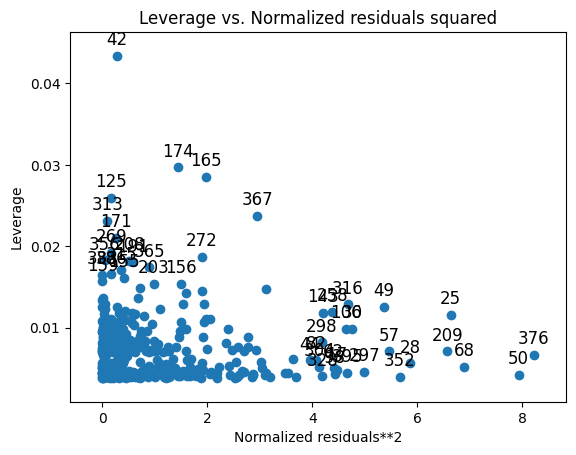

In [73]:
import matplotlib.pyplot as plt
sm.graphics.plot_leverage_resid2(model)
plt.show()